Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\29861\AppData\Local\Temp\jieba.cache
Loading model cost 0.663 seconds.
Prefix dict has been built successfully.


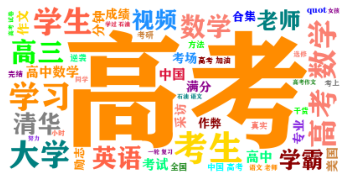

In [1]:
#-*- codeing = utf-8 -*- 

"""
    对全部标题数据的词云图

"""

# 导入工具包
import  jieba                               #分词（将一个句子分成很多个词语）
from matplotlib import pyplot as plt        #绘图，数据可视化，点状图、柱状图等科学绘图，和echarts不同，不是直接用于网站，而是生成图片
from wordcloud import WordCloud             #词云，形成有遮罩效果的
from PIL import Image               #用来做图像处理的（官方默认）
import numpy as np                  #矩阵运算
from matplotlib import colors       # 用于颜色数组的建立
import pandas as pd                 # 用于读取文件数据

# 1. 读取数据

data = pd.read_excel('../01_data_get/Data-总（播放量）.xlsx',header=0)
# print(data.shape[0])    #数量
# print(data.head())            #数据内容,只打印了头部的前4个信息


# 2. 分词
#词云是按照词来进行统计的，这个使用jieba自动进行词频统计
text = ''.join(data['标题'])        #此处将所有的标题进行了整合连成一个字符串
# print(text)
#cut = jieba.cut(text)   #将一个字符串进行分割
words = list(jieba.cut(text))
ex_sw_words = []
#下方是对目前的一些字符串进行筛选，将一些没有意义的词语进行清除
stop_words = [x.strip() for x in open('stopwords.txt', encoding="utf-8")]
for word in words:
    if len(word) > 1 and (word not in stop_words):
        ex_sw_words.append(word)
string = ' '.join(ex_sw_words)         #此处将其对象cut变成字符串，可在下方显示，#' '.join(cut)  以指定字符串空格‘ ’作为分隔符，将 cut 中所有的元素(的字符串表示)合并为一个新的字符串

# 3.词云图可视化

# 遮罩图片
# img = Image.open(r'遮罩.jpg')   #打开遮罩图片
# img_arry = np.array(img)        #将图片转换为数组，有了数组即可做词云的封装了



#建立颜色数组，可更改颜色
color_list=['#CD853F','#DC143C','#00FF7F','#FF6347','#8B008B','#00FFFF','#0000FF','#8B0000','#FF8C00',
            '#1E90FF','#00FF00','#FFD700','#008080','#008B8B','#8A2BE2','#228B22','#FA8072','#808080']

#调用
colormap=colors.ListedColormap(color_list)

# 词云图的属性设置
wc = WordCloud(
    background_color='white',   #背景必须是白色
    # mask = img_arry,            #传入遮罩的图片，必须是数组
    font_path = "方正粗黑宋简体.ttf",  #设置字体，（字体如何找，可以在C:/windows/Fonts中找到名字）
    colormap=colormap,  # 设置文字颜色
    max_font_size=150,  # 设置字体最大值
    random_state=18,    # 设置有多少种随机生成状态，即有多少种配色方案
    max_words=50        # 设置上限多少个词 
)
# 词云图的文本来源
wc.generate_from_text(string)         #从哪个文本生成wc,这个文本必须是切好的词

#绘制图片
fig = plt.figure(1)             #1表示第一个位置绘制
plt.imshow(wc)                  #按照wc词云的规格显示
plt.axis('off')                 #是否显示坐标轴，不显示（单一图片）
# plt.show()                      #显示生成的词云图片
plt.savefig(r'词云-总（播放量）.jpg',dpi=800)      #输出词云图片到文件,默认清晰度是400，这里设置500可能有点高,注意此处要保存，show()方法就得注释



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


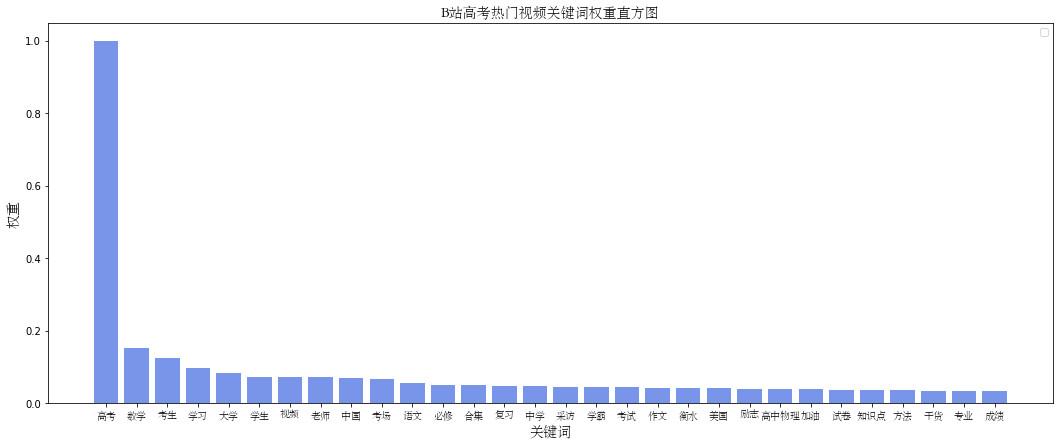

In [2]:
"""TextRank算法计算关键词和重要性排序"""

# 导入工具
import matplotlib.pyplot as plt
import jieba.analyse
from matplotlib import font_manager        #导入字体管理模块


# 1.预处理

# 处理中文字体的显示问题
my_font = font_manager.FontProperties(fname="C:/WINDOWS/Fonts/STSONG.TTF")
#定义中文字体属性，文字储存路径可以在C:/WINDOWS/Fonts/找到，这里设置为宋体

# 定义关键词和权重
keywords= []
weights = []



# 2.计算数据
# 计算前30个词，生成字符串，并计算权重
Topwords = jieba.analyse.textrank(string,topK=30,withWeight=True)

# 写入结果
for i in Topwords:
    keywords.append(i[0])
    weights.append(i[1])



# 3.关键词权重的可视化

plt.figure(figsize=(18, 7)) # 图片比例

plt.bar(keywords, weights,color='royalblue',alpha=0.7) # 设置变量、颜色、遮罩（不透明度）

plt.legend(loc="upper right",prop=my_font)  # 设置位置以及中文字体

# 坐标轴名称的设置
plt.xlabel("关键词",fontproperties = my_font,fontsize = 14) # 注意要设置字体
plt.ylabel('权重',fontproperties = my_font,fontsize = 14)

# 图片的标题设置
plt.title(u'B站高考热门视频关键词权重直方图',fontproperties = my_font,fontsize = 14)

# x轴刻度设置
plt.xticks(keywords, fontproperties=my_font,fontsize = 10)

# plt.show() # 图片显示，和savefig两个写一个就好
plt.savefig(r'关键词权重图-总(播放量).jpg')  # 图片保存

In [3]:
"""词频词性统计"""

# 通过jieba的posseg库进行分词，统计词频
# 导入库
import jieba
import jieba.posseg as pseg
import xlwt # 用于打开表格和写入数据

# 1. 创建容器
# 创建工作簿
workbook = xlwt.Workbook()
# 创建工作表
worksheet = workbook.add_sheet('词性词频')
# 设置表头
worksheet.write(0,0,'词')
worksheet.write(0,1,'词性')
worksheet.write(0,2,'词频')

# 2. 分词
rets = pseg.cut(text)

# 3. 词性和词频统计
# 创建需要使用的列表和字典
words_frequency = {} # 词与词频
words_seg = {}  # 词与词性
words_all_data = [] # 词性与词频

# 每一个pseg分词后的数据类型是pair
# 对于每一个pair的数据的数据记得要转化成列表数据
for ret in rets:
    ret = list(ret) # 转换成列表数据
    words_seg[ret[0]] = ret[1]  # 写入分词与词性，利用字典避免重复

    # 词频统计
    if words_frequency.get(ret[0]):
        words_frequency[ret[0]] += 1
    else:
        words_frequency[ret[0]] = 1
# 验证结果
print(words_seg)

# 将词、词频和词性都放在同一个列表内，并存入words_all_data内
for key in words_frequency.keys():
    # 定义一个列表
    a = []

    # 写入词、词频、词性
    a.append(key)
    a.append(words_frequency[key])
    a.append(words_seg[key])
    words_all_data.append(a)
    
print(words_all_data)  

# 3. 导入数据
count = 1 # 设置一个循环的计数器
# 写入工作表
for i in words_all_data:
    worksheet.write(count,0,i[0])
    worksheet.write(count,1,i[1])
    worksheet.write(count,2,i[2])
    count+=1
# 保存成表格
workbook.save('词性词频-总（播放量）.xlsx') 


# 提示成功
print('分词结果保存成功')


{'【': 'x', '醒醒': 'v', '】': 'x', '中华儿女': 'n', '该': 'r', '起床': 'v', '了': 'ul', '高中数学': 'l', '基础': 'n', '与': 'p', '解法': 'v', '全集': 'n', '（': 'x', '涵盖': 'v', '所有': 'b', '）': 'x', '|': 'x', '长期': 'd', '更新': 'd', '从零开始': 'i', '拯救': 'v', '学渣': 'n', '！': 'x', '通俗易懂': 'l', '竞赛': 'vn', '国': 'n', '一': 'm', '保送生': 'n', '主讲': 'v', '数学': 'n', '有救': 'v', '干货': 'n', '满满': 'v', '包含': 'v', '必修': 'v', '二': 'm', '三': 'm', '四': 'm', '五': 'm', '衡水': 'ns', '中学': 'n', '“': 'x', '学霸': 'n', '”': 'x', '励志': 'n', '演讲': 'v', '：': 'x', '这': 'r', '世间': 'n', '，': 'x', '唯有': 'b', '青春': 'ns', '梦想': 'n', '不可': 'v', '辜负': 'v', '-': 'x', '高一': 'b', '高二': 'nr', '高三': 'nr', '高考': 'v', '专题': 'n', '复习': 'v', '一轮': 'm', '篇': 'q', '+': 'x', '提高': 'v', '选修': 'v', '看': 'v', '完': 'v', '这个': 'r', '视频': 'n', '你': 'r', '会': 'v', '爱': 'v', '上': 'f', '的': 'uj', '提前': 'v', '15': 'm', '分钟': 'q', '交卷': 'n', '考生': 'v', '除了': 'p', '动作': 'n', '快': 'a', '还': 'd', '句句': 'q', '金句': 'n', '...': 'm', '最强': 'a', '催泪': 'n', '人': 'n', '为什么': 'r', '要

{'x': 3630, 'v': 3149, 'n': 2909, 'r': 719, 'ul': 189, 'l': 126, 'p': 262, 'b': 83, 'd': 582, 'i': 85, 'vn': 168, 'm': 909, 'ns': 233, 'nr': 315, 'q': 118, 'f': 141, 'uj': 452, 'a': 330, 'ad': 46, 'tg': 11, 'ng': 37, 'eng': 175, 'nz': 134, 'j': 42, 'c': 114, 'u': 29, 't': 149, 's': 51, 'y': 70, 'zg': 32, 'nrt': 17, 'ud': 8, 'z': 12, 'nt': 29, 'df': 9, 'uz': 5, 'g': 2, 'vd': 4, 'vg': 8, 'ug': 21, 'o': 16, 'k': 10, 'ag': 7, 'an': 4, 'e': 5, 'rz': 4, 'uv': 2, 'yg': 1, 'mq': 5}


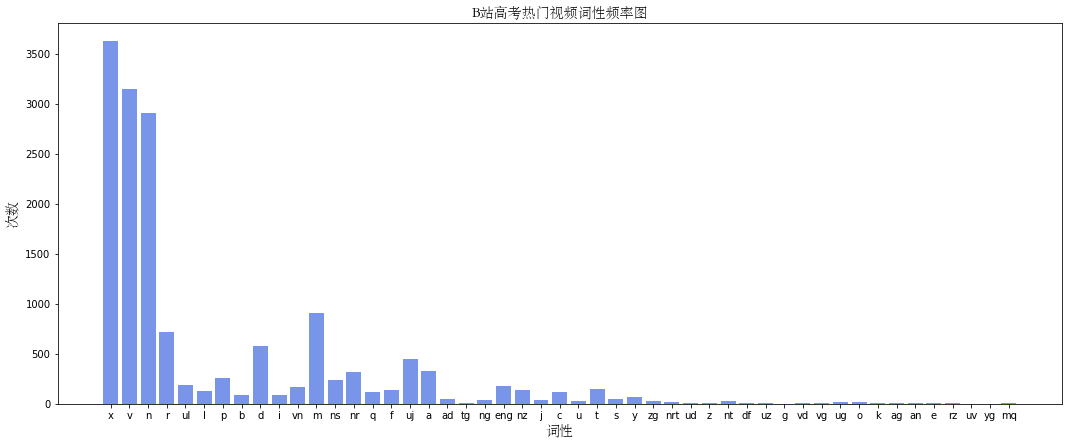

In [4]:
"""根据词性频数的可视化"""
# 定义词性和词频的字典
cixing = {}
# 遍历获取信息
for i in words_all_data:
    if cixing.get(i[2]):
        cixing[i[2]] += i[1]
    else:
        cixing[i[2]] = i[1]
print(cixing) # 打印数据

# 定义x与y
x3 = []
y3 = []
# 遍历获取数据
for i in cixing.keys():
    x3.append(i)
    y3.append(cixing[i])

figure = plt.figure(figsize=(18, 7))

# 在画布上添加1个子块，标定绘图位置
axes1 = plt.subplot(1, 1, 1)

# 绘制条形图
axes1.bar(x3, y3, width=0.8,color='royalblue',alpha=0.7)

# 条形图基本属性设置
axes1.set_title('B站高考热门视频词性频率图',fontproperties = my_font,fontsize = 14)
axes1.set_ylabel('次数',fontproperties = my_font,fontsize = 14)
axes1.set_xlabel('词性',fontproperties = my_font,fontsize = 14)

# 展示
# plt.show()
# 保存图片

plt.savefig('B站高考热门视频词性频率图.jpg')


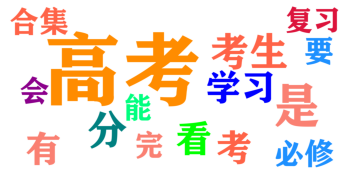

In [19]:
"""动词的词云图"""


# 定义动词的字典
v_dic = {}  

# for循环和if条件语句筛选信息
for i in words_frequency.keys():
    if words_seg[i]=='v'and words_seg[i]!='vn'and words_seg[i]!='vd'and words_seg[i]!='vg'and words_seg[i]!='uv'and words_seg[i]!='uv'and words_seg[i]!='uj':
        v_dic[i] = words_frequency[i]
#建立颜色数组，可更改颜色
color_list=['#CD853F','#DC143C','#00FF7F','#FF6347','#8B008B','#00FFFF','#0000FF','#8B0000','#FF8C00',
            '#1E90FF','#00FF00','#FFD700','#008080','#008B8B','#8A2BE2','#228B22','#FA8072','#808080']
wordcloud = WordCloud(font_path='方正粗黑宋简体.ttf',background_color="white",width =4000,height= 2000,margin= 10,
                        colormap=colormap,  # 设置文字颜色
                        random_state=18,    # 设置有多少种随机生成状态，即有多少种配色方
                        max_words=15
                         ).fit_words(v_dic)
plt.imshow(wordcloud)
plt.axis('off') 
# 显示
# plt.show()
# 保存为图片
plt.savefig('B站高考热门视频动词频率图.jpg')


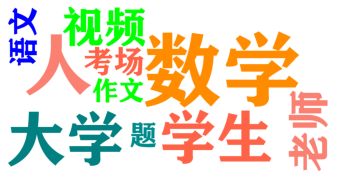

In [22]:
"""名词的词云图"""


# 定义名词字典

n_dic = {}  


# for循环和if条件语句筛选信息
for i in words_frequency.keys():
    if words_seg[i]=='n'and words_seg[i]!='vn'and words_seg[i]!='ns'and words_seg[i]!='nr'and words_seg[i]!='ng'and words_seg[i]!='eng'and words_seg[i]!='nrt':
        n_dic[i] = words_frequency[i]
#建立颜色数组，可更改颜色
color_list=['#CD853F','#DC143C','#00FF7F','#FF6347','#8B008B','#00FFFF','#0000FF','#8B0000','#FF8C00',
            '#1E90FF','#00FF00','#FFD700','#008080','#008B8B','#8A2BE2','#228B22','#FA8072','#808080']
wordcloud = WordCloud(font_path='方正粗黑宋简体.ttf',background_color="white",width =4000,height= 2000,margin= 10,
                        colormap=colormap,  # 设置文字颜色
                        random_state=18,    # 设置有多少种随机生成状态，即有多少种配色方
                        max_words=10
                         ).fit_words(n_dic)
plt.imshow(wordcloud)
plt.axis('off') 
# 显示
# plt.show()
# 保存为图片
plt.savefig('B站高考热门视频名词频率图.jpg')


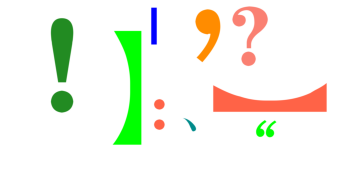

In [21]:
"""符号的词云图"""

# 定义符号字典
x_dic = {}  


# for循环和if条件语句筛选信息
for i in words_frequency.keys():
    if words_seg[i]=='x':
        x_dic[i] = words_frequency[i]


#建立颜色数组，可更改颜色
color_list=['#CD853F','#DC143C','#00FF7F','#FF6347','#8B008B','#00FFFF','#0000FF','#8B0000','#FF8C00',
            '#1E90FF','#00FF00','#FFD700','#008080','#008B8B','#8A2BE2','#228B22','#FA8072','#808080']
wordcloud = WordCloud(font_path='方正粗黑宋简体.ttf',background_color="white",width =4000,height= 2000,margin= 10,
                        colormap=colormap,  # 设置文字颜色
                        random_state=18,    # 设置有多少种随机生成状态，即有多少种配色方
                        max_words=10
                         ).fit_words(x_dic)
plt.imshow(wordcloud)
plt.axis('off') 
# 显示
# plt.show()
# 保存为图片
plt.savefig('B站高考热门视频符号频率图.jpg')


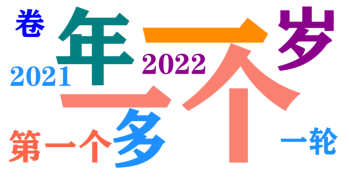

In [24]:
"""数词的词云图"""


# 定义数词字典
m_dic = {}  


# for循环和if条件语句筛选信息
for i in words_frequency.keys():
    if words_seg[i]=='m':
        m_dic[i] = words_frequency[i]


#建立颜色数组，可更改颜色
color_list=['#CD853F','#DC143C','#00FF7F','#FF6347','#8B008B','#00FFFF','#0000FF','#8B0000','#FF8C00',
            '#1E90FF','#00FF00','#FFD700','#008080','#008B8B','#8A2BE2','#228B22','#FA8072','#808080']
            
wordcloud = WordCloud(font_path='方正粗黑宋简体.ttf',background_color="white",width =4000,height= 2000,margin= 10,
                        colormap=colormap,  # 设置文字颜色
                        random_state=18,    # 设置有多少种随机生成状态，即有多少种配色方
                        max_words=10
                         ).fit_words(m_dic)
plt.imshow(wordcloud)
plt.axis('off') 
# 显示
# plt.show()
# 保存为图片
plt.savefig('B站高考热门视频数词频率图.jpg')


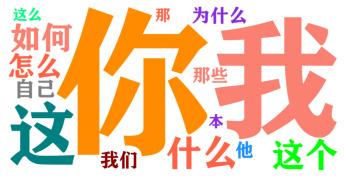

In [15]:
"""代词的词云图"""


# 定义代词字典
r_dic = {}  

# for循环和if条件语句筛选信息
for i in words_frequency.keys():
    if words_seg[i]=='r':
        r_dic[i] = words_frequency[i]
#建立颜色数组，可更改颜色
color_list=['#CD853F','#DC143C','#00FF7F','#FF6347','#8B008B','#00FFFF','#0000FF','#8B0000','#FF8C00',
            '#1E90FF','#00FF00','#FFD700','#008080','#008B8B','#8A2BE2','#228B22','#FA8072','#808080']
wordcloud = WordCloud(font_path='方正粗黑宋简体.ttf',background_color="white",width =4000,height= 2000,margin= 10,
                        colormap=colormap,  # 设置文字颜色
                        random_state=18,    # 设置有多少种随机生成状态，即有多少种配色方
                        max_words=15
                         ).fit_words(r_dic)
plt.imshow(wordcloud)
plt.axis('off') 
# 显示
# plt.show()
# 保存为图片
plt.savefig('B站高考热门视频代词频率图.jpg')


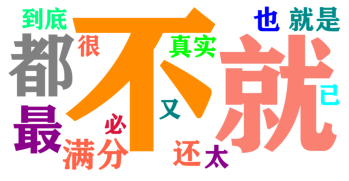

In [20]:
"""副词的词云图"""

# 定义副词字典
d_dic = {}  

# for循环和if条件语句筛选信息
for i in words_frequency.keys():
    if words_seg[i]=='d':
        d_dic[i] = words_frequency[i]

        
#建立颜色数组，可更改颜色
color_list=['#CD853F','#DC143C','#00FF7F','#FF6347','#8B008B','#00FFFF','#0000FF','#8B0000','#FF8C00',
            '#1E90FF','#00FF00','#FFD700','#008080','#008B8B','#8A2BE2','#228B22','#FA8072','#808080']
wordcloud = WordCloud(font_path='方正粗黑宋简体.ttf',background_color="white",width =4000,height= 2000,margin= 10,
                        colormap=colormap,  # 设置文字颜色
                        random_state=18,    # 设置有多少种随机生成状态，即有多少种配色方
                        max_words=15
                         ).fit_words(d_dic)
plt.imshow(wordcloud)
plt.axis('off') 
# 显示
# plt.show()
# 保存为图片
plt.savefig('B站高考热门视频副词频率图.jpg')


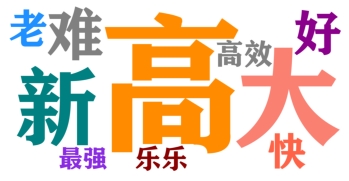

In [11]:
"""形容词的词云图"""

# 定义形容词字典
a_dic = {}  

# for循环和if条件语句筛选信息
for i in words_frequency.keys():
    if words_seg[i]=='a':
        a_dic[i] = words_frequency[i]

        
#建立颜色数组，可更改颜色
color_list=['#CD853F','#DC143C','#00FF7F','#FF6347','#8B008B','#00FFFF','#0000FF','#8B0000','#FF8C00',
            '#1E90FF','#00FF00','#FFD700','#008080','#008B8B','#8A2BE2','#228B22','#FA8072','#808080']
wordcloud = WordCloud(font_path='方正粗黑宋简体.ttf',background_color="white",width =4000,height= 2000,margin= 10,
                        colormap=colormap,  # 设置文字颜色
                        random_state=18,    # 设置有多少种随机生成状态，即有多少种配色方
                        max_words=10
                         ).fit_words(a_dic)
plt.imshow(wordcloud)
plt.axis('off') 
# 显示
# plt.show()
# 保存为图片
plt.savefig('B站高考热门视频形容词频率图.jpg')


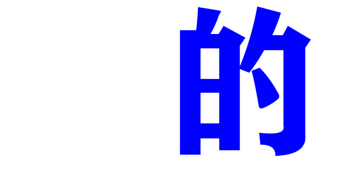

In [12]:
"""结构助词的的词云图"""

# 定义结构助词字典
uj_dic = {}  

# for循环和if条件语句筛选信息
for i in words_frequency.keys():
    if words_seg[i]=='uj':
        uj_dic[i] = words_frequency[i]

        
#建立颜色数组，可更改颜色
color_list=['#CD853F','#DC143C','#00FF7F','#FF6347','#8B008B','#00FFFF','#0000FF','#8B0000','#FF8C00',
            '#1E90FF','#00FF00','#FFD700','#008080','#008B8B','#8A2BE2','#228B22','#FA8072','#808080']
wordcloud = WordCloud(font_path='方正粗黑宋简体.ttf',background_color="white",width =4000,height= 2000,margin= 10,
                        colormap=colormap,  # 设置文字颜色
                        random_state=18,    # 设置有多少种随机生成状态，即有多少种配色方
                        max_words=10
                         ).fit_words(uj_dic)
plt.imshow(wordcloud)
plt.axis('off') 
# 显示
# plt.show()
# 保存为图片
plt.savefig('B站高考热门视频结构助词的频率图.jpg')
